# ****============ SENTIMENT ANALYSIS =============****

A través de este trabajo se busca poder integrar nociones y conocimientos sobre NLP vistas
en el módulo, así como en los previos para generar un modelo de machine learning.
El objetivo que van a tener es construir un clasificador el cual pueda predecir si una revisión
realizada por un usuario es positiva o negativa (buena o mala).
Para ello, utilizaremos un conjunto de datos que pertenece a la plataforma Yelp. Esta,
posee una red de usuarios, los cuales realizan opiniones sobre lugares nocturnos, espacios
culturales, locales comerciales, entre otros.
El dataset a trabajar se encuentra en el siguiente link. Deberán realizar un análisis de
features, así como su preparación necesaria antes de iniciar el desarrollo del modelo.
Objetivos
Deberán generar un modelo de machine learning el cual pueda clasificar review en inglés
para la plataforma Yelp. Es decir, nuestro modelo recibirá una review de un usuario, y
deberá ser capaz de determinar si esta es positiva o negativa.
Dataset
Las features que contiene este dataset son las siguientes:
● business_id: identificador del negocio al que se está realizando la review.
● cool: cantidad de votos por haber sido una review “cool”.
● date: fecha de realización de la revisión
● funny: cantidad de votos para una revisión “divertida”.
● review_id: identificador único de revisión (ofuscado).
● stars: cantidad de estrellas otorgadas por el usuario en referencia a la review.
● text: revisión realizada por el usuario sobre un determinado negocio.
● useful: cantidad de votos recibido por los usuarios a los cuales le resultó útil la
revisión.
● user_id: id del usuario en la plataforma (ofuscado)
Cuento con los datos del business (negocio) sobre el que se realizó la review por si
consideran que es necesario para sumar features, datos, etc.
Consideraciones
● No contamos con una variable target como pasa en problemas de la vida real. Por
ello, un desafío extra que se presenta es cómo definir un target, basado en las
features del dataset.
● Muchas veces cuando importamos un dataset pandas infiere que valor podría ser,
de no encontrar un valor conocido pone uno por defecto.Validar que los tipos de
datos de las features después de importarse correspondan con su valor intrínseco es
una buena práctica.
Diplomatura en Data Science Aplicada 2020
● Haga una rápida exploración de valores atípicos (outliers) del conjunto de datos.
Realice los gráficos que considere pertinente para entender la naturaleza del
problema.
● Como aplicación opcional, sería interesante investigar, y evaluar si sobre nuestro
problema sirve implementar Recursive Feature Elimination, y como y donde lo
harían

In [1]:
#Importando librerias
#Librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Seleccion de features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Algoritmo de modelado
from sklearn.cluster import KMeans

#Evaluacion del modelo
#from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings(action="ignore")

#Funcion de preprocesameinto de datos
#import func_prepro as pre

/home/fer/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
#Cargamos todos los archivos csv
df = pd.read_csv('data/reviews_yelp_nn.csv',sep='\t',header=0)

In [3]:
#tamaño del dataset
df.shape

(3342958, 9)

In [4]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.0,uJRdHLz4XNmDK5pOkWbZNA,5.0,"Best Dim Sum in the city, their cart service i...",0.0,POETn3fQcZ8ngLAARCATSg
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.0,TlPh8jy8bt_TSGfjEw-pvA,5.0,How... HOW did I not head down here sooner? Fo...,7.0,oUK6Xs5dPPnP4whFeZExGg
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.0,GmoBAVE1pTo0kjmeKrXmLQ,4.0,Carnitas were wonderful. First time there and ...,0.0,SiaSUNlKQK7f57WBPmyyNw
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.0,ZHuM9P81zfuNuFZ5ThXNRg,5.0,Great staff who are always willing to help. I ...,0.0,PsH5Qi8R69WAlhNv8mXWRA
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.0,-2Ce00mfWYP20yt7k6kARg,3.0,"This place is bigger, brighter, new so it's cl...",3.0,r-zUIQPaHzvIyL93wQaoiQ


### Distribucion de los datos por review

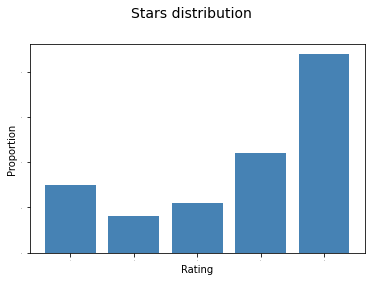

In [6]:
ratings = df['stars']
fig = plt.figure(figsize = (6, 4))

title = fig.suptitle('Stars distribution', fontsize = 14)

fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Rating")
ax.set_ylabel("Proportion")
w_q = ratings.value_counts(normalize = True)
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis = 'both', which = 'major', labelsize = 0.5)
bar = ax.bar(w_q[0], w_q[1], color = 'steelblue')

### Creamos la variable target

In [7]:
#definimos que las review con 4 o 5 estrellas seran positivas, y las que posean menos seran negativas
def get_target(star):
    return 'positive' if star> 3 else 'negative'


In [8]:
df['target']= df['stars'].apply(lambda x: get_target(x))

In [9]:
df.tail()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,target
3342953,oryS4vX0xkKC4tOekgowDQ,0,2016-07-17 21:32:48,0.0,pBNcMg-KVzZG-xDu9cgLww,2.0,Slow service to seat and then to serve. Left w...,0.0,srjcYNoIOXJ57VP8z7gwmQ,negative
3342954,na4Th5DrNauOv-c43QQFvA,4,2017-11-28 22:43:05,2.0,xNG2SzEHJi7w7LbJDF7Oog,4.0,I stayed at the Bellagio for 3 nights this mon...,12.0,uCNgCZCuo07ew0sWPB1z7g,positive
3342955,Lg238Ittk3KO3lqHyBAcYA,1,2016-10-07 06:05:29,1.0,RCNXjfRdRZ2exHihiy-oqw,5.0,1: book an appointment! You get to walk past ...,1.0,v1w2A6kHRiI1OD4DyXOiDQ,positive
3342956,NxeEdKkvbZmuuBar_1NFrg,1,2014-10-19 18:02:56,2.0,g0mcjOV3o3-dPzpKiRecDg,1.0,"This review is based on quality of pricing, no...",13.0,j-i6_zboeko9mkR9UIFKMw,negative
3342957,yvtxKjAySVvpPKt0VLWscQ,0,2018-07-02 20:38:51,0.0,rH76Hu3UG1HcfeDS3zJS-A,2.0,I posted and review earlier that was removed. ...,0.0,yWFFDVEoY_g3aCtMWf7odQ,negative


# ** 1. Exploración de datos **

En esta etapa se lleva a cabo la exploración de datos para obtener información que puede ser útil para la empresa.

In [10]:
#vemos si existe alguna columna que repita el mismo valor para todos los registros 
df.nunique()

business_id     186747
cool               248
date           3309298
funny              187
review_id      3342949
stars                5
text           3338493
useful             232
user_id        1114848
target               2
dtype: int64

In [11]:
df.duplicated().any() # no hay duplicados de registros 

False

### Chequeamos si existen valores nulos

<AxesSubplot:>

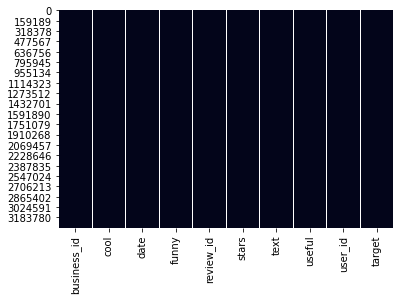

In [12]:
sns.heatmap(df[df.columns[0:20]].isnull(), cbar=False)

#### Podemos observar que no hay nulos

### Analizamos outliers

<AxesSubplot:>

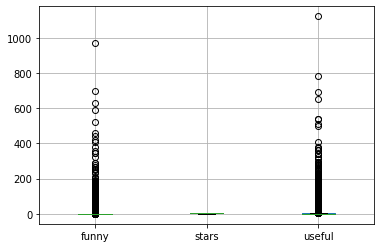

In [13]:
#valores outliers 
df.boxplot()

In [14]:
#vemos que tenemos valores outliers en funny y useful entonces los trataremos 
df.loc[df['funny']>df['funny'].quantile(0.99),'funny'] = df['funny'].quantile(0.99)
df.loc[df['useful']>df['useful'].quantile(0.99),'useful'] = df['useful'].quantile(0.99)

<AxesSubplot:>

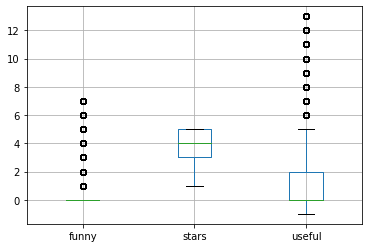

In [15]:
#vemos como nos quedo el dataset luego de la eliminacion de outliers
df.boxplot()

In [16]:
#tamaño del dataset luego de la eliminacion de outliers 
df.shape

(3342958, 10)

### Mapa de correlación

Text(0.5, 1, 'Mapa de correlación')

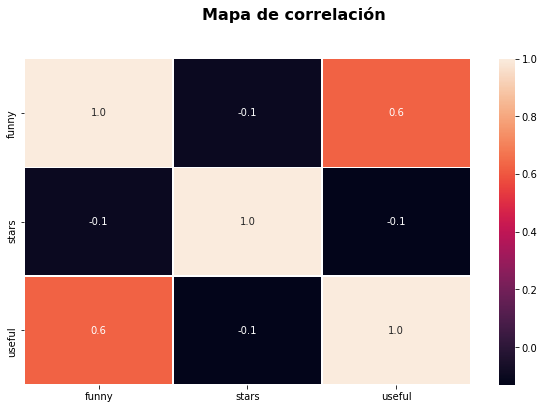

In [17]:
#mapa de correlacion
f,ax = plt.subplots(figsize=(10, 6))
g = sns.heatmap(df.corr(),
            annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.suptitle("Mapa de correlación",
               fontsize=16, weight="bold", y=1)

#### Podemos observar que las variables que presentan mayor correlacion son useful con funny

### Sampleo de los datos

In [18]:
# proporcion porcada tipo de estrella --ANDRE esto es lo qeu hizo el profe de la proporcion para luego hacer el sampling
stars=df.groupby(['stars'])['stars'].count()/df['stars'].count().sum()
stars


stars
1.0    0.149914
2.0    0.081144
3.0    0.110502
4.0    0.219540
5.0    0.438900
Name: stars, dtype: float64

In [19]:
weights = [
    {'id': 1,'weight': 0.149914},
    {'id': 2,'weight': 0.081144},
    {'id': 3,'weight': 0.110502},
    {'id': 4,'weight': 0.219540},
    {'id': 5,'weight': 0.438900}
]

def getWeight(rate):
    for x in weights:
        if rate == x['id']:
            return x['weight']
        
df['weights'] = df['stars'].apply( lambda x: getWeight(x) )

In [20]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,target,weights
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.0,uJRdHLz4XNmDK5pOkWbZNA,5.0,"Best Dim Sum in the city, their cart service i...",0.0,POETn3fQcZ8ngLAARCATSg,positive,0.438900
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.0,TlPh8jy8bt_TSGfjEw-pvA,5.0,How... HOW did I not head down here sooner? Fo...,7.0,oUK6Xs5dPPnP4whFeZExGg,positive,0.438900
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.0,GmoBAVE1pTo0kjmeKrXmLQ,4.0,Carnitas were wonderful. First time there and ...,0.0,SiaSUNlKQK7f57WBPmyyNw,positive,0.219540
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.0,ZHuM9P81zfuNuFZ5ThXNRg,5.0,Great staff who are always willing to help. I ...,0.0,PsH5Qi8R69WAlhNv8mXWRA,positive,0.438900
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.0,-2Ce00mfWYP20yt7k6kARg,3.0,"This place is bigger, brighter, new so it's cl...",3.0,r-zUIQPaHzvIyL93wQaoiQ,negative,0.110502


### Haremos un sample basado en los pesos de distribucion

In [21]:
#mantenemos los pesos, el objetivo es que el sampleo no pierda la distribucion de esos pesos
sample = df.sample(n=1000, weights='weights', random_state=1)
sample.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,target,weights
1393861,oHeiAs-mnDJU1_4BD8_5Dg,0,2014-03-23 00:18:23,1.0,7h2PQpdxX3mu1Tj2yrapEQ,4.0,Excited that there's a new place to eat around...,11.0,h7a4TrmV9rBrBIcJgD54CQ,positive,0.21954
2407437,RC676YqyW2DCf9HhF1dPOQ,0,2015-03-26 17:26:05,0.0,Ntt4zSXcNM1p9HoI2usVag,5.0,I found this studio when I received a spa find...,1.0,dIHe5qoehkggNLcExPw_VQ,positive,0.43890
396,5QNXZcclknB2PkfeN7FJWQ,2,2011-04-04 00:57:05,2.0,Tc_BpEyOIN1OMJMoyXqugw,4.0,Rating this place is almost unfair. First off....,3.0,2DECrukmumziXTBI20idTA,positive,0.21954
1011074,K-SsrPH0nFExdpLrTo1X1w,0,2015-12-09 00:25:39,0.0,BX-1VF4f5PvwYbbwFysE2A,4.0,"Burgatory is a great place to ""get your carniv...",0.0,cz8H43bKsrhv_KHRgk07QQ,positive,0.21954
490528,Ac-DbrST8bF9Cpge5D9_Cg,0,2015-09-06 05:18:36,0.0,4FpiAh_Y3gvFU_uygV1U7Q,4.0,The best Pho and dumplings I've had in Pittsbu...,0.0,icmG-ZBRNSScSUJ-Nj1lhQ,positive,0.21954


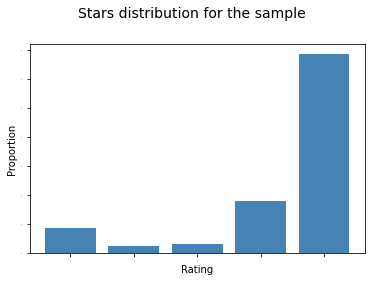

In [22]:
#Veremos si la distribucion de los datos luego del sampleo es similar a la previa
ratings = sample['stars']
fig = plt.figure(figsize = (6, 4))

title = fig.suptitle('Stars distribution for the sample', fontsize = 14)

fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Rating")
ax.set_ylabel("Proportion")
w_q = ratings.value_counts(normalize = True)
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis = 'both', which = 'major', labelsize = 0.5)
bar = ax.bar(w_q[0], w_q[1], color = 'steelblue')

In [23]:
sample.shape

(1000, 11)

In [7]:
#review by user 
top_20_review_by_user = df['review_id'].groupby(df['user_id']).sum().sort_values(ascending=False)[:20]
top_20_review_by_user.head()
# ¿Qué ciudad compra más?
#fig=plt.figure(figsize=(16,9))
#sns.barplot(y=top_20_review_by_user.index,x=top_20_review_by_user.values)
#plt.title('Top 20 Ciudades que más compran',fontsize=20)
#plt.xlabel('Total de productos',fontsize=17)
#plt.ylabel('Ciudad',fontsize=17)

user_id
KqKirfrjzVukVC91EF_tAw    zzzqdnN5WatsvzwyxJE33wLpQ4-HPBBSYR6MMvgxwkYQv_...
Mo3L-LcQBiFO2Ohhj51XHQ    zzzblSSTZhw51XZ2swYvBgej7GbQV71A3engI2HYfcogcO...
sw0QzFDaWsxCs9NcGytVEA                               zzzJmOMxynKml1OL0eD1hA
XDQw8_kaTaovGLYT5DgwBQ    zzymH5hqrPD80Mj-U86dEQW136AvKH1YdXh3srP3TQTQhb...
8DAyqTs-Bv7G7VWWSv6u1g         zzyhZImTk0RoLZIB8aleeQrlQMDJf6jWjeKE2NpaBykw
Name: review_id, dtype: object

# ** 3. Modelado **

En esta etapa, el modelado se llevará a cabo utilizando un algoritmo de agrupamiento denominado K-Means basado en el análisis RFM (Recency, Frequency, and Monetary) para la segmentación de clientes.

## ** 3.1 Análisis RFM **

El análisis RFM es un método utilizado para ver patrones en los clientes en función de sus hábitos de compra:

1. Recency = ¿Cuándo fue la última vez que el cliente realizó una transacción?
 
2. Frecuencia = ¿Con qué frecuencia el cliente realiza una compra?

3. Monetario = cuánto gastan los clientes

In [ ]:
#ver las fechas de compra e inicio
print('Min : {}, Max : {}'.format(min(all_data.order_purchase_timestamp), max(all_data.order_purchase_timestamp)))

In [ ]:
#Calcular RFM
import datetime as dt
pin_date = max(all_data.order_purchase_timestamp) + dt.timedelta(1)

#Creo un dataframe para RFM
rfm = all_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x: (pin_date - x.max()).days,
    'order_item_id' : 'count', 
    'payment_value' : 'sum'})
#este dataframe va a contener hace cuantos dias hicieron la ultima compra, cuantos productos compraron en el periodo
#bajo estudio y cuanto gastaron en esos productos, en el mismo periodo

rfm.rename(columns = {'order_purchase_timestamp' : 'Recency', 
                      'order_item_id' : 'Frequency', 
                      'payment_value' : 'Monetary'}, inplace = True)

rfm.head()

## ** 3.2 Manejo de valores atípicos **

En esta etapa, limpiaremos los datos de las entradas que pueden ser incorrectas o las anomalías de los datos que tenemos.

In [ ]:
#Usamos Rangos intercuartilicos
def limit(i):
    Q1 = rfm[i].quantile(0.5)
    Q3 = rfm[i].quantile(0.95)
    IQR = Q3 - Q1
    
    
    lower_limit = rfm[i].quantile(0.5) - (IQR * 1.5)
    lower_limit_extreme = rfm[i].quantile(0.5) - (IQR * 3)
    upper_limit = rfm[i].quantile(0.95) + (IQR * 1.5)
    upper_limit_extreme = rfm[i].quantile(0.5) + (IQR * 3)
    print('Lower Limit:', lower_limit)
    print('Lower Limit Extreme:', lower_limit_extreme)
    print('Upper Limit:', upper_limit)
    print('Upper Limit Extreme:', upper_limit_extreme)

def percent_outliers(i):
    Q1 = rfm[i].quantile(0.5)
    Q3 = rfm[i].quantile(0.95)
    IQR = Q3 - Q1
    
    lower_limit = rfm[i].quantile(0.5) - (IQR * 1.5)
    lower_limit_extreme = rfm[i].quantile(0.5) - (IQR * 3)
    upper_limit = rfm[i].quantile(0.95) + (IQR * 1.5)
    upper_limit_extreme = rfm[i].quantile(0.95) + (IQR * 3)
    print('Lower Limit: {} %'.format(rfm[(rfm[i] >= lower_limit)].shape[0]/ rfm.shape[0]*100))
    print('Lower Limit Extereme: {} %'.format(rfm[(rfm[i] >= lower_limit_extreme)].shape[0]/rfm.shape[0]*100))
    print('Upper Limit: {} %'.format(rfm[(rfm[i] >= upper_limit)].shape[0]/ rfm.shape[0]*100))
    print('Upper Limit Extereme: {} %'.format(rfm[(rfm[i] >= upper_limit_extreme)].shape[0]/rfm.shape[0]*100))

In [ ]:
sns.boxplot(x=rfm["Recency"])

In [ ]:
sns.boxplot(x=rfm["Frequency"])

La columna Frecuencia no elimina los valores atípicos porque los valores atípicos aquí son de hecho la posibilidad de que los clientes realicen muchas transacciones porque estos datos se toman de 2017-2018

In [ ]:
sns.boxplot(x=rfm["Monetary"])

In [ ]:
print(limit('Monetary'))
print('-'*50)
print(percent_outliers('Monetary'))

In [ ]:
#se eliminan los valores outliers de aquellos que hayan gastado mas de 1500 
outliers1_drop = rfm[(rfm['Monetary'] > 1500)].index
rfm.drop(outliers1_drop, inplace=True)

## ** 3.3 Percentil RFM **

En esta etapa, se crearán grupos de clientes basados ​​en Recency, Frequency y Monetary dividiéndolos en grupos de 3 **** en cada uno.

In [ ]:
# Crear grupos de clientes basados en Recency, Frequency y Monetary
#Porque en Recency cuantos menos días pasaron desde la ultima compra mejor
r_labels = range(3, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 3, labels = r_labels).astype('int')

# Debido a que en la frecuencia vemos muchos valores igual a 1, entonces no puede usar qcut,
#porque el valor se apoyará más
f_groups = pd.qcut(rfm.Frequency.rank(method='first'), 3).astype('str')
#rfm['F'] = np.where((rfm['Frequency'] != 1) & (rfm['Frequency'] != 2), 3, rfm.Frequency)

m_labels = range(1, 4)
m_groups = pd.qcut(rfm.Monetary, q = 3, labels = m_labels).astype('int')

In [ ]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [ ]:
rfm['F'].value_counts()

In [ ]:
rfm['F'] = rfm['F'].replace({'(0.999, 30871.333]' : 1,
                             '(30871.333, 61741.667]' : 2,
                             '(61741.667, 92612.0]' : 3}).astype('int')

In [ ]:
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

In [ ]:
score_labels = ['Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(rfm.RFM_Score, q=3, labels = score_labels)
rfm['RFM_Level'] = score_groups.values
rfm.head()

## ** 3.4 Manejo de la inclinación y el escalado **

Para los datos que ingresarán al algoritmo K-Means, la distribución es normal porque facilitará la formación de grupos, luego no olvides igualar la escala de cada columna porque se medirá en función de la distancia entre cada entrada.

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'], kde_kws={'bw': 0.1}, label='Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

rfm_log = rfm[['Recency', 'Monetary']].apply(np.log, axis = 1).round(3)
rfm_log['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
rfm_log.head()

In [ ]:
scaler = StandardScaler()
minmax = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [ ]:
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.subplot(3, 1, 1); sns.distplot(rfm_scaled.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_scaled.Frequency, kde_kws={'bw': 0.1}, label='Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_scaled.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

## ** 3.5 Agrupamiento de K-Means **

Aquí la agrupación se realizará utilizando el algoritmo K-Means para obtener el grupo óptimo de datos RFM

In [ ]:
wcss = {}

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300)
    kmeans.fit(rfm_scaled)
    wcss[i] = kmeans.inertia_
    
fig, ax = plt.subplots(figsize=(16, 9))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.title('Método del codo')
plt.xlabel('Números de K')
plt.ylabel('WCSS')
plt.show()

Podemos observar en el grafico que la clusterizacion optima se encuentra entre 3 y 5 por lo que realizaremos la evaluacion y 
visualizacion con 3, 4 y 5 clusters para luego elegir aquellos que mejores resultados den.

## Clusterización con k=3

In [ ]:
clus = KMeans(n_clusters= 3, n_init=10, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

In [ ]:
rfm['K_Cluster'] = clus.labels_
rfm.head()

## ** 3.6 Evaluación **

Después de crear un modelo usando KMeans, ahora evaluaremos el modelo si los grupos que forma son realmente diferentes de cada grupo usando el Análisis de Silhouuette. Cuanto más se acerca al número 1, la diferencia que tiene con otras computadoras es cada vez más clara, si el valor está cerca de 0, entonces se parece cada vez más a un grupo cercano y, si -1, hizo un grupo incorrecto.

In [ ]:
visualizer = SilhouetteVisualizer(clus)

visualizer.fit(rfm_scaled) 
visualizer.poof() 

## ** 3.7 Visualización **

Visualizaremos para que sea más fácil ver el clúster que creamos con el clúster del algoritmo KMeans. Usaremos 'Snake Plot' en el mundo del marketing para ver qué categorías se incluyen en un clúster.



In [ ]:
rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)
rfm_scaled.head()

In [ ]:
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['customer_unique_id', 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

Como podemos ver en los dos gráficos anteriores, podemos concluir con base en grupos:
1. Bronce (1 y 0): la frecuencia no es demasiado alta en comparación con la transacción nominal, pero la última vez que realizó una transacción rápida
2. Plata (2): la frecuencia es bastante alta y la transacción nominal es bastante alta, pero la última vez que realizó una transacción fue bastante larga
3. Oro (3): la frecuencia de gasto es alta y la cantidad gastada también es alta, pero el tiempo de transacción es largo

In [ ]:
# ¿Cuántos clientes hay según su categoría?
rfm_cus_level = rfm_scaled.groupby('RFM_Level')['customer_unique_id'].nunique().reset_index()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=rfm_cus_level['customer_unique_id'], x=rfm_cus_level['RFM_Level'])
plt.title('Clientes basados en su nivel RFM',fontsize=20)
plt.xlabel('Nivel RFM',fontsize=17)
plt.ylabel('Cantidad de clientes',fontsize=17)

## Clusterización con k=5

In [ ]:
#Por ultimo realizaremos el mismo analisis pero para 5 clusters 

#Crearemos grupos teniendo en cuenta recency, frecuency y monetary diviendolos en grupos de 5

# Crear grupos de clientes basados en Recency, Frequency y Monetary
#En Recency cuantos menos días pasaron desde la ultima compra mejor es
r_labels = range(5, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 5, labels = r_labels).astype('int')

f_groups = pd.qcut(rfm.Frequency.rank(method='first'), 5).astype('str')

m_labels = range(1, 6)
m_groups = pd.qcut(rfm.Monetary, q = 5, labels = m_labels).astype('int')

In [ ]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [ ]:
rfm['F'].value_counts()

In [ ]:
#reemplazaremos los rangos por los valores 1, 2, 3, 4 y 5
rfm['F'] = rfm['F'].replace({'(0.999, 18523.2]' : 1,
                             '(74089.8, 92612.0]' : 2,
                             '(37045.4, 55567.6]' : 3,
                             '(55567.6, 74089.8]' : 4,
                             '(18523.2, 37045.4]' : 5}).astype('int')

In [ ]:
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

In [ ]:
#le pondremos nombre a nuestras 5 categorias que representaran los grupos de clientes 
score_labels = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
score_groups = pd.qcut(rfm.RFM_Score, q=5, labels = score_labels)
rfm['RFM_Level'] = score_groups.values
rfm.head()

In [ ]:
#Inclinacion y escalonado 

rfm_log = rfm[['Recency', 'Monetary']].apply(np.log, axis = 1).round(4)
rfm_log['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
rfm_log.head()

In [ ]:
scaler = StandardScaler()
minmax = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

In [ ]:
#Agrupamiento de clusters 
clus = KMeans(n_clusters= 5, n_init=10, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

In [ ]:
rfm['K_Cluster'] = clus.labels_
rfm.head()

### Evaluación

In [ ]:
#Evaluaremos el modelo utilizando el metodo de la silueta 

visualizer = SilhouetteVisualizer(clus)

visualizer.fit(rfm_scaled) 
visualizer.poof() 

Podemos observar que con esta nueva distribucion la nueva agrupacion no es tan buena como las anteriores

El score del metodo de silueta nos esta dando menos de 0.4 y los grupos estan siendo muy diferentes entre si 

### Visualización

In [ ]:
##Visualizacion de los clusters

rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)
rfm_scaled.head()

In [ ]:
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['customer_unique_id', 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

Observandolos graficos anteriores podemos observar como se comportan los 5 grupos 
1. Diamond: frecuencia de compra muy alta, valor monetario de gasto alto, y compro por ultima vez hace muy poco
2. Platinum: frecuencia de compra muy alta, valor monetario de gasto alto, y compro por ultima vez hace poco
3. Gold: frecuencia de compra media, valor monetario de gasto medio, y compro por ultima vez ni hace mucho ni hace muy poco
4. Silver: frecuencia de compra media, valor monetario de gasto medio bajo, y compro por ultima vez hace mucho
5. Bronze: frecuencia de compra muy bajo, valor monetario de gasto muy bajo, y compro por ultima vez hace muchisimo 

In [ ]:
# ¿Cuántos clientes hay según su categoría?
rfm_cus_level = rfm_scaled.groupby('RFM_Level')['customer_unique_id'].nunique().reset_index()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=rfm_cus_level['customer_unique_id'], x=rfm_cus_level['RFM_Level'])
plt.title('Clientes basados en su nivel RFM',fontsize=20)
plt.xlabel('Nivel RFM',fontsize=17)
plt.ylabel('Cantidad de clientes',fontsize=17)

## Clusterización con k=4

In [ ]:
#Crearemos grupos teniendo en cuenta recency, frecuency y monetary diviendolos en grupos de 4 

# Crear grupos de clientes basados en Recency, Frequency y Monetary
#En Recency cuantos menos días pasaron desde la ultima compra mejor es
r_labels = range(4, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 4, labels = r_labels).astype('int')

f_groups = pd.qcut(rfm.Frequency.rank(method='first'), 4).astype('str')

m_labels = range(1, 5)
m_groups = pd.qcut(rfm.Monetary, q = 4, labels = m_labels).astype('int')

In [ ]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [ ]:
rfm['F'].value_counts()

In [ ]:
#reemplazaremos los rangos por los valores 1, 2, 3 y 4 
rfm['F'] = rfm['F'].replace({'(0.999, 23153.75]' : 1,
                             '(69459.25, 92612.0]' : 2,
                             '(23153.75, 46306.5]' : 3,
                             '(46306.5, 69459.25]' : 4}).astype('int')

In [ ]:
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

In [ ]:
#Asignaremos los nuevos labels para estos 4 grupos 
score_labels = ['Frizados', 'Imperdibles', 'Prometedores', 'Campeones']
score_groups = pd.qcut(rfm.RFM_Score, q=4, labels = score_labels)
rfm['RFM_Level'] = score_groups.values
rfm.head()

In [ ]:
#Inclinacion y escalonado 

rfm_log = rfm[['Recency', 'Monetary']].apply(np.log, axis = 1).round(4)
rfm_log['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
rfm_log.head()

In [ ]:
scaler = StandardScaler()
minmax = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

In [ ]:
#Agrupamiento de clusters 
clus = KMeans(n_clusters= 4, n_init=10, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

In [ ]:
rfm['K_Cluster'] = clus.labels_
rfm.head()

### Evaluación

In [ ]:
#Evaluaremos el modelo utilizando el metodo de la silueta 

visualizer = SilhouetteVisualizer(clus)

visualizer.fit(rfm_scaled) 
visualizer.poof() 

### Visualización

In [ ]:
##Visualizacion de los clusters

rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)
rfm_scaled.head()

In [ ]:
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['customer_unique_id', 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

Conclusion de lo observado en los graficos anteriores 
1. Grupo Campeones: podemos observar que la frecuencia de compra es media alta, pero el valor monetario es muy alto y la ultima vez que compro fue hace muy poco 
2. Grupo Prometedores: la frecuencia en que compra es alta, el valor monetario gastado es medio alto (menor al grupo platinum) y compro hace medianamente poco por ultima vez 
3. Grupo Imperdibles: compra con una frecuencia media baja, tiene gastos medios tambien y la ultima compro la realizo hace mucho 
4. Grupo Frizados: la frecuencia con que compran y el valor monetario son muy bajos, y hace mucho mas tiempo que cualquier otro grupo que realizo la ultima compra 

#### ¿Cuántos clientes hay según su categoría?

In [ ]:
rfm_cus_level['customer_unique_id']

In [ ]:
rfm_cus_level = rfm_scaled.groupby('RFM_Level')['customer_unique_id'].nunique().reset_index()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=rfm_cus_level['customer_unique_id'], x=rfm_cus_level['RFM_Level'])
plt.title('Clientes basados en su nivel RFM',fontsize=20)
plt.xlabel('Nivel RFM',fontsize=17)
plt.ylabel('Cantidad de clientes',fontsize=17)

## 4. CONCLUSIÓN
Luego del analisis realizado para clusterizacion de 3, 4 y 5 grupos, elegimos proceder con la clusterizacion en 4 grupos, ya que para 4 grupos la media se encuentra cerca de 0,4 y la distribucion entre los grupos es mas homogenea que para k=3, para el casop de k=5 la media ya nos da por debajo de 0,4 y los grupos son muy distintos entre sí.

A continuación describiremos cada uno de los grupos y la accion a realizar para los mismos. 

En cuanto a los objetivos de este proyecto, que es facilitar que el departamento de marketing lleve a cabo campañas o promociones basadas en la segmentación de clientes, estas son las conclusiones:

* Frizados: son clientes que no realizan compras con demasiada frecuencia, el valor nominal de sus transacciones es muy bajo, y la ultima vez que realizaron una compra fue hace mucho tiempo. Hay 27868 clientes de este tipo. 

** Acción de campaña: posiblemente sean clientes perdidos. En este caso hay que evaluar si vale la pena invertir recursos para recuperarlos. 

* Imperdibles: la frecuencia con que compran es media alta, pero el valor nominal es medio bajo, y la ultima vez que compraron fue hace mucho tiempo. Hay 35792 clientes de este tipo. 

** Acción de campaña: hay peligro de perder estos clientes, hay que analizar sus preferencias para armar productos o combos a su medida. Hay que ofrecerles descuentos u ofertas economicas para que vuelvan a comprar porque es la categoría con mayor cantidad de clientes. 

* Prometedores: son aquellos clientes que compran con mayor frecuencia y el valor monetario gastado es medio alto, la ultima vez que realizaron una compra fue hace medianamente poco. Hay 14763 clientes de este tipo.

** Acción de campaña: son clientes potenciales que realizan muchas compras y podrian convertirse en campeones, hay que buscar convertirlos en campeones a través de ofrecerles beneficios y promociones, por ejemplo, luego de cada compra que realicen. 

* Campeones: si bien la frecuencia de compra no es la mas alta de todas, son los clientes que mayor dinero gastan en sus transacciones y ademas, la ultima vez que compraron fue hace muy poco. Hay 14189 clientes de este tipo.

** Acción de campaña: hay que premiarlos y hacerlos sentir bien para que sigan manteniendo su fidelidad. 

## A continuación determinaremos acciones concretas a realizar para los segmentos más críticos: Imperdibles y Frizados. Para ello compararemos diferencias en las preferencias de compras de cada uno de estos dos segmentos con respecto al conjunto total de compradores.

In [ ]:
#Primero unimos la tabla de RFM con ALL_DATA
all_data_rfm= all_data.merge(rfm_scaled, on='customer_unique_id')

In [ ]:
# ¿Qué categoría de productos tienen más demanda para el segmento IMPERDIBLES??
top_20_product_best_seller = all_data_rfm.loc[all_data_rfm['RFM_Level']=='Imperdibles','order_item_id'].groupby(all_data['product_category_name_english']).sum().sort_values(ascending=False)[:20]
#print(top_20_product_best_seller)

# Lo trazamos para visualización
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_product_best_seller.index,x=top_20_product_best_seller.values)
plt.title('Top 20 Categorías más vendidas para Imperdibles',fontsize=20)
plt.xlabel('Total de productos vendidos',fontsize=17)
plt.ylabel('Categoría de producto',fontsize=17)

### Acción: Observamos que para este segmento  la categoría de "sport leisure" y "housewares" tienen mayor aceptación que para el conjunto completo de los clientes. Por lo tanto nos enfocaremos en esas categorías para ofrecer promociones especiales mediante una campaña de e-mails masivos.

In [ ]:
# ¿Qué productos tienen más demanda para el segmento IMPERDIBLES?
top_10_product_best_seller = all_data_rfm.loc[all_data_rfm['RFM_Level']=='Imperdibles','order_item_id'].groupby(all_data_rfm['product_id']).sum().sort_values(ascending=False)[:10]

# Lo trazamos para visualización
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_product_best_seller.index,x=top_10_product_best_seller.values)
plt.title('Top  Productos más vendidos para los Imperdibles',fontsize=20)
plt.xlabel('Total de productos vendidos',fontsize=17)
plt.ylabel('ID de producto',fontsize=17)

### Acción: A partir de conocer cuales son los 10 productos mas demandados por el segmento Imperdibles ofreceremos el beneficio de envío gratuito si el carrito de compras contine al menos 2 de esos productos.

In [ ]:
# ¿Cuál es el tiempo de entrega promedio Para el segmento Imperdibles?
delivery_time_by_month = all_data_rfm.loc[all_data_rfm['RFM_Level']=='Imperdibles','order_delivery_time'].groupby(all_data_rfm['Month_order']).median(numeric_only=False) #masukan argumen numeric_only untuk menghitung timedelta


fig=plt.figure(figsize=(16,9))
plt.plot(delivery_time_by_month.index, delivery_time_by_month.values / 86400, marker='o')
plt.title('Tiempo promedio de entrega por mes para el segmento Imperdibles',fontsize=20)
plt.xlabel('Mes',fontsize=17)
plt.xticks(#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          rotation=90)
plt.ylabel('Tiempo (Día)',fontsize=17)

### Conclusión: Para el segmento imperdibles no observamos diferencia en los tiempos de entrega con respecto al promedio de todos los clientes. Las curvas son prácticamente iguales. Por lo tanto no tomaremos una acción a partir de este dato.

### Ahora analizaremos el segmento de Frizados, para averiguar sus particularidades e intentar atraerlos nuevamente

In [ ]:
# ¿Qué categoría de productos tienen más demanda para el segmento Frizados??
top_20_product_best_seller = all_data_rfm.loc[all_data_rfm['RFM_Level']=='Frizados','order_item_id'].groupby(all_data['product_category_name_english']).sum().sort_values(ascending=False)[:20]
#print(top_20_product_best_seller)

# Lo trazamos para visualización
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_product_best_seller.index,x=top_20_product_best_seller.values)
plt.title('Top 20 Categorías más vendidas para Frizados',fontsize=20)
plt.xlabel('Total de productos vendidos',fontsize=17)
plt.ylabel('Categoría de producto',fontsize=17)

### Conclusión: Vemos que este segmento valora más las categorías de productos de "health_beauty" y "computer_accesories" con respecto al promedio de clientes, por lo tanto nos enfocaremos en analizar los productos de estas dos categorías antes de tomar una acción.

In [ ]:
# ¿Qué productos de la categoría "health_beauty" tienen más demanda para el segmento Frizados?
top_10_product_best_seller = all_data_rfm.loc[(all_data_rfm['RFM_Level']=='Frizados') & (all_data_rfm['product_category_name_english']=='health_beauty'),'order_item_id'].groupby(all_data_rfm['product_id']).sum().sort_values(ascending=False)[:10]

# Lo trazamos para visualización
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_product_best_seller.index,x=top_10_product_best_seller.values)
plt.title('Top 10 Productos de categoría health_beauty más vendidos para los Frizados',fontsize=20)
plt.xlabel('Total de productos vendidos',fontsize=17)
plt.ylabel('ID de producto',fontsize=17)

In [ ]:
# ¿Qué productos de la categoría "computers_accessories" tienen más demanda para el segmento Frizados?
top_10_product_best_seller = all_data_rfm.loc[(all_data_rfm['RFM_Level']=='Frizados') & (all_data_rfm['product_category_name_english']=='computers_accessories'),'order_item_id'].groupby(all_data_rfm['product_id']).sum().sort_values(ascending=False)[:10]

# Lo trazamos para visualización
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_product_best_seller.index,x=top_10_product_best_seller.values)
plt.title('Top 10 Productos de categoría computers_accessories más vendidos para los Frizados',fontsize=20)
plt.xlabel('Total de productos vendidos',fontsize=17)
plt.ylabel('ID de producto',fontsize=17)

### Acción: Tras analizar las categorías preferidas del segmento Frizados y observar cuales son los 10 productos más consumidos dentro de esas categorías tomaremos la acción de hacer una campaña de promoción masiva por e-mail ofreciendo dichos productos.